In [5]:
import pandas as pd
import numpy as np
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import array

C:\Users\Student\AppData\Local\Temp\ipykernel_26920\2571484101.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
# Read the text file
data = pd.read_csv(r'C:\Users\Student\Documents\ML_Adi\EXP 2\profit.txt', sep=',', header=None)

# Add column headers
data.columns = [ 'Population', 'Profit']

# Save the data to a CSV file
data.to_csv(r'C:\Users\Student\Documents\ML_Adi\EXP 2\Profit.csv', index=False)

df = pd.read_csv(r'C:\Users\Student\Documents\ML_Adi\EXP 2\Profit.csv')

In [7]:
regression_model = LinearRegression()

In [15]:
# Extract the 'population' and 'profit' columns.reshape(-1, 1)
population = df['Population'].values.reshape(-1,1)
profit= df['Profit'].values

In [ ]:
learning_rate = 0.01
num_iterations = 1000
theta = np.zeros(2)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = np.dot(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []
    for i in range(num_iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = (1 / m) * np.dot(X.T, errors)
        theta = theta - learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

X = np.column_stack((np.ones(len(population)), population))
theta, cost_history = gradient_descent(X, profit, theta, learning_rate, num_iterations)


In [16]:
# Fit the model to the data
regression_model.fit(population,profit)

LinearRegression()

In [17]:
profit_predicted = regression_model.predict(population) # Predict

In [19]:
# model evaluation
rmse = mean_squared_error(profit, profit_predicted)
r2 = r2_score(profit, profit_predicted)

In [20]:
# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [1.19303364]
Intercept: -3.895780878311852
Root mean squared error:  8.953942751950356
R2 score:  0.7020315537841397


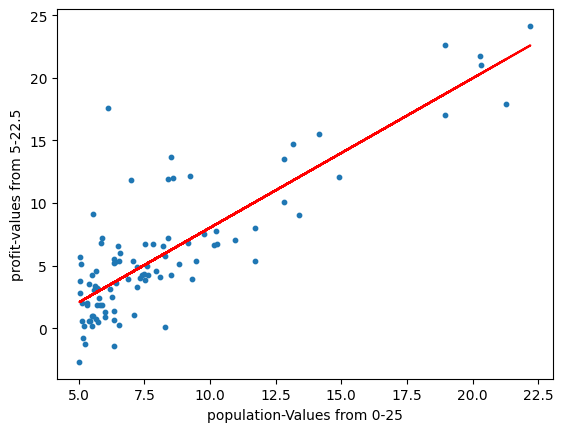

In [21]:
 # plotting values # data points
plt.scatter(population, profit, s=10)
plt.xlabel('population-Values from 0-25')
plt.ylabel('profit-values from 5-22.5')
plt.plot(population,profit_predicted, color='r')
plt.show()